In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.1.0


In [3]:
mnist = keras.datasets.mnist

# MNIST data load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))

60000


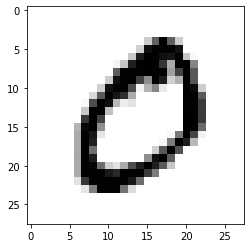

In [4]:
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

In [5]:
print(y_train[1])

0


In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print('min : ', np.min(x_train), 'max : ', np.max(x_train))

min :  0 max :  255


In [8]:
# preprocessing
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('min : ', np.min(x_train_norm), 'max : ', np.max(x_train_norm))

min :  0.0 max :  1.0


In [9]:
# LeNet
n_channel_1 = 16
n_channel_2 = 32
n_dense = 64
n_train_epoch = 10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print(len(model.layers))

9


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)


In [12]:
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 284us/sample - loss: 0.2864 - accuracy: 0.9131
Epoch 2/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.1045 - accuracy: 0.9683
Epoch 3/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0792 - accuracy: 0.9759
Epoch 4/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0641 - accuracy: 0.9811
Epoch 5/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0546 - accuracy: 0.9833
Epoch 6/10
60000/60000 [==============================] - 12s 197us/sample - loss: 0.0464 - accuracy: 0.9856
Epoch 7/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.0423 - accuracy: 0.9868
Epoch 8/10
60000/60000 [==============================] - 12s 199us/sample - loss: 0.0364 - accuracy: 0.9883
Epoch 9/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0330 - accuracy: 0.9

In [14]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10000/10000 - 2s - loss: 0.0517 - accuracy: 0.9862
test_loss : 0.051703004656359554
test_accuracy : 0.9861999750137329


In [15]:
# check

predicted_result = model.predict(x_test_reshaped) # model predict value
predicted_labels = np.argmax(predicted_result, axis=1)

idx = 0 # 1st test sample!
print('model.predict() result : ', predicted_result[idx])
print('high possibility : ', predicted_labels[idx])
print('real data label : ', y_test[idx])

model.predict() result :  [7.3764501e-11 2.0611065e-08 4.3259007e-07 4.2456197e-08 3.7033174e-10
 1.8762382e-10 1.9317005e-12 9.9999952e-01 9.9425135e-10 5.5104127e-08]
high possibility :  7
real data label :  7


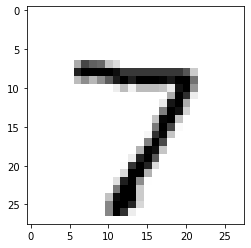

In [16]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

predict random distribution : [2.4943706e-06 3.2290918e-04 2.2778651e-03 5.3709298e-01 3.9777872e-01
 3.2617307e-05 7.6622556e-11 1.4878236e-03 1.5570873e-05 6.0989030e-02]
label :4


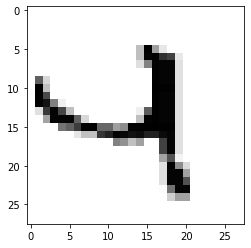

predict random distribution : [3.6081998e-05 2.0213688e-10 5.7972947e-08 1.9509508e-07 9.9898845e-01
 2.7991024e-07 4.2342042e-05 1.5301239e-08 9.4985648e-05 8.3756261e-04]
label :6


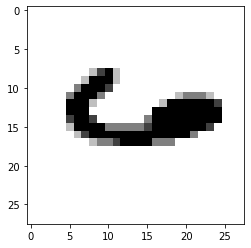

predict random distribution : [2.6694665e-06 1.9310139e-06 1.7498962e-04 6.2799227e-01 1.5565487e-06
 2.8421560e-01 2.8306229e-07 1.5488669e-09 1.5703120e-04 8.7453730e-02]
label :9


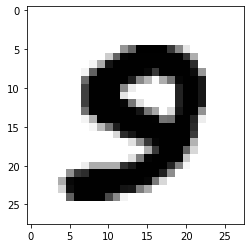

predict random distribution : [1.5758389e-05 2.4252717e-04 2.4944177e-02 6.3383374e-03 2.9698745e-07
 1.0339480e-04 1.3102520e-05 9.6709698e-01 1.1741607e-03 7.1287490e-05]
label :2


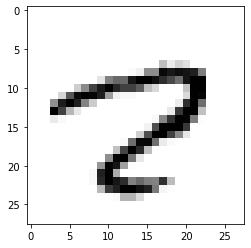

predict random distribution : [1.9874804e-04 4.1105952e-08 1.2095073e-05 1.3972267e-06 5.7626379e-01
 2.9519124e-06 4.2347372e-01 1.4364486e-09 1.3319092e-05 3.3919630e-05]
label :6


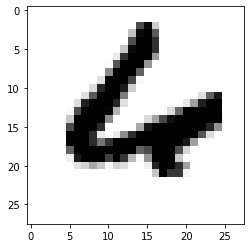

In [17]:
import random
wrong_predict_list = []
for i, _ in enumerate(predicted_labels):
    # ith test_labels != y_test
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
# 5 wrong answer in wrong_predict_list
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print('predict random distribution : ' + str(predicted_result[n]))
    print('label :' + str(y_test[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()